In [48]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.core import datetools
from pandas import Series, DataFrame
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA


In [49]:
series = read_csv('winnebago.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.tail())

Month
1971-10-01     937.0
1971-11-01    1396.0
1971-12-01    1174.0
1972-01-01     628.0
1972-02-01    1753.0
Name: Sales, dtype: float64


In [50]:
# Take the first difference as identified in the previous assignment
diff = series.diff(periods=1)
diff.dropna(inplace=True)

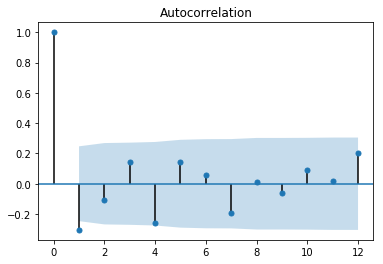

In [51]:
# Look at the ACF and PACF plots for this data
plot_acf(diff,lags=12)

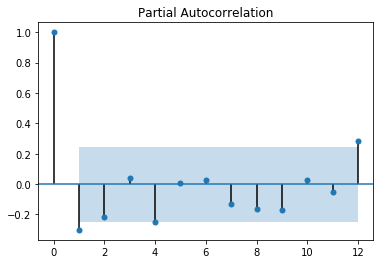

In [52]:
plot_pacf(diff,lags=12)

In [53]:
# do you observe MA or AR signatures?

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   63
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -422.188
Method:                       css-mle   S.D. of innovations            195.875
Date:                Thu, 15 Mar 2018   AIC                            850.375
Time:                        14:13:21   BIC                            856.805
Sample:                    12-01-1966   HQIC                           852.904
                         - 02-01-1972                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            19.6263      8.165      2.404      0.019       3.623      35.629
ma.L1.D.Sales    -0.6826      0.152     -4.486      0.000      -0.981      -0.384
                                    Root

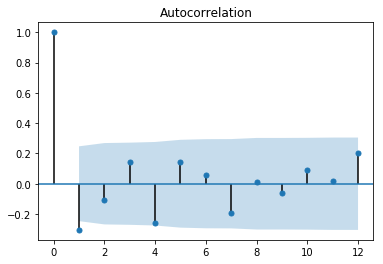

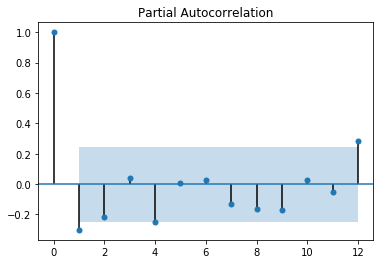

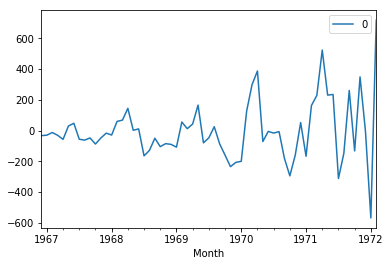

                0
count   63.000000
mean    -1.164699
std    197.466903
min   -567.913729
25%    -96.977927
50%    -29.818170
75%     54.162986
max    717.732568


In [54]:
# fit model
model = ARIMA(series, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
print(residuals.describe())

In [55]:
from statsmodels.tsa.arima_model import ARMAResults

In [56]:
results = ARIMA(series, order=(0,1,1)).fit()
results.forecast(steps=3)

(array([ 1282.7233091 ,  1302.34963286,  1321.97595662]),
 array([ 195.87492129,  205.50645096,  214.70635291]),
 array([[  898.81551791,  1666.6311003 ],
        [  899.56439039,  1705.13487533],
        [  901.15923765,  1742.79267558]]))